In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scikitplot
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

Для начала изучим и немного преобразуем наши данные. Разделим данные для обучения на объясняющие (X_train) и результирующую (Y_train) выборки, тестовую выборку (X_test).

Начнем работу с данными. Прежде всего, поработаем с пропущенными и пустыми значениями, а также неинформативными признаками.

In [10]:
Train = pd.read_csv('application_train.csv', delimiter=',')
Test = pd.read_csv('application_test.csv', delimiter=',')

In [11]:
X_train = Train.drop(['TARGET'], 1)
Y_train = Train['TARGET']
X_test = Test
X_train

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002         Cash loans           M            N   
1           100003         Cash loans           F            N   
2           100004    Revolving loans           M            Y   
3           100006         Cash loans           F            N   
4           100007         Cash loans           M            N   
...            ...                ...         ...          ...   
307506      456251         Cash loans           M            N   
307507      456252         Cash loans           F            N   
307508      456253         Cash loans           F            N   
307509      456254         Cash loans           F            N   
307510      456255         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0           24700.5         351000.0  ...                0                0   
1           35698.5        1129500.0  ...                0                0   
2            6750.0         135000.0  ...                0                0   
3           29686.5         297000.0  ...                0                0   
4           21865.5         513000.0  ...                0                0   
...             ...              ...  ...              ...              ...   
307506      27558.0         225000.0  ...                0                0   
307507      12001.5         225000.0  ...                0                0   
307508      29979.0         585000.0  ...                0                0   
307509      20205.0         319500.0  ...                0                0   
307510      49117.5         675000.0  ...                0                0   

       FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                     0                0                        0.0   
1                     0                0                        0.0   
2                     0                0                        0.0   
3                     0                0                        NaN   
4                     0                0                        0.0   
...                 ...              ...                        ...   
307506                0                0                        NaN   
307507                0                0                        NaN   
307508                0                0                        1.0   
307509                0                0                        0.0   
307510                0                0                        0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             NaN                         NaN   
4                             0.0                         0.0   
...                           ...                         ...   
307506                        NaN                         NaN   
307507                        NaN                   

1) Стоит убрать ID кредитного случая, так как он точно не имеет влияния

2) Выбирать столбцы для обучения модели будем после оценки корреляции признаков между собой и удаления тех, что имеют сильную корреляцию (>=0.85)

In [12]:
X_train = X_train.drop(['SK_ID_CURR'], 1)

In [13]:
corr_matrix = X_train.corr()

In [14]:
na_udalenie = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
drop1 = [column for column in na_udalenie.columns if any(na_udalenie[column] >= 0.85)]
drop2 = [column for column in na_udalenie.columns if any(na_udalenie[column] <= -0.85)]
print(f'Удаление признаков с корреляцией >= 0.85 = {drop1}')
X_train.drop(drop1, axis=1, inplace = True)
print(f'Удаление признаков с корреляцией <= -0.85 = {drop2}')
X_train.drop(drop2, axis=1, inplace = True)

/opt/envs/conda3/envs/beakerx/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


Удаление признаков с корреляцией >= 0.85 = ['AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']
Удаление признаков с корреляцией <= -0.85 = ['FLAG_EMP_PHONE']


In [15]:
X_train

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0              Cash loans           M            N               Y   
1              Cash loans           F            N               N   
2         Revolving loans           M            Y               Y   
3              Cash loans           F            N               Y   
4              Cash loans           M            N               Y   
...                   ...         ...          ...             ...   
307506         Cash loans           M            N               N   
307507         Cash loans           F            N               Y   
307508         Cash loans           F            N               Y   
307509         Cash loans           F            N               Y   
307510         Cash loans           F            N               N   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                  0          202500.0    406597.5      24700.5   
1                  0          270000.0   1293502.5      35698.5   
2                  0           67500.0    135000.0       6750.0   
3                  0          135000.0    312682.5      29686.5   
4                  0          121500.0    513000.0      21865.5   
...              ...               ...         ...          ...   
307506             0          157500.0    254700.0      27558.0   
307507             0           72000.0    269550.0      12001.5   
307508             0          153000.0    677664.0      29979.0   
307509             0          171000.0    370107.0      20205.0   
307510             0          157500.0    675000.0      49117.5   

       NAME_TYPE_SUITE      NAME_INCOME_TYPE  ... FLAG_DOCUMENT_18  \
0        Unaccompanied               Working  ...                0   
1               Family         State servant  ...                0   
2        Unaccompanied               Working  ...                0   
3        Unaccompanied               Working  ...                0   
4        Unaccompanied               Working  ...                0   
...                ...                   ...  ...              ...   
307506   Unaccompanied               Working  ...                0   
307507   Unaccompanied             Pensioner  ...                0   
307508   Unaccompanied               Working  ...                0   
307509   Unaccompanied  Commercial associate  ...                0   
307510   Unaccompanied  Commercial associate  ...                0   

       FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0                     0                0                 0   
1                     0                0                 0   
2                     0                0                 0   
3                     0                0                 0   
4                     0                0                 0   
...                 ...              ...               ...   
307506                0                0                 0   
307507                0                0                 0   
307508                0                0                 0   
307509                0                0                 0   
307510                0                0                 0   

        AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              0.0                        0.0   
...                            ...                        ...   
307506                         NaN                        NaN   
307507                         NaN                        NaN   
307508                         1.0                        0.0   
307509                         0.0                        0.0   
307510                         0.0                        0.

Полученный набор столбцов оставляем и в тестовой выборке

In [16]:
X_test = X_test[X_train.columns]

Теперь нужно преобразовать категориальные признаки и пустые значения. 

Категориальные переменные будем преобразовывать, используя метод Target Encoding, заменяя соответствующее значение средним значением переменной AMT_CREDIT (та, что по идее является целевой переменной в условиях нашей задачи).

Пропущенные значения заменим на 0

In [17]:
not_num_train = pd.DataFrame(X_train.select_dtypes(include=['object'])).columns

In [18]:
for i in not_num_train:
    print(f"X_train['{i}_encoding'] = code_mean(X_train,'{i}','AMT_CREDIT')")
    
    print(f"X_test['{i}_encoding'] = code_mean(X_test,'{i}','AMT_CREDIT')")

X_train['NAME_CONTRACT_TYPE_encoding'] = code_mean(X_train,'NAME_CONTRACT_TYPE','AMT_CREDIT')
X_test['NAME_CONTRACT_TYPE_encoding'] = code_mean(X_test,'NAME_CONTRACT_TYPE','AMT_CREDIT')
X_train['CODE_GENDER_encoding'] = code_mean(X_train,'CODE_GENDER','AMT_CREDIT')
X_test['CODE_GENDER_encoding'] = code_mean(X_test,'CODE_GENDER','AMT_CREDIT')
X_train['FLAG_OWN_CAR_encoding'] = code_mean(X_train,'FLAG_OWN_CAR','AMT_CREDIT')
X_test['FLAG_OWN_CAR_encoding'] = code_mean(X_test,'FLAG_OWN_CAR','AMT_CREDIT')
X_train['FLAG_OWN_REALTY_encoding'] = code_mean(X_train,'FLAG_OWN_REALTY','AMT_CREDIT')
X_test['FLAG_OWN_REALTY_encoding'] = code_mean(X_test,'FLAG_OWN_REALTY','AMT_CREDIT')
X_train['NAME_TYPE_SUITE_encoding'] = code_mean(X_train,'NAME_TYPE_SUITE','AMT_CREDIT')
X_test['NAME_TYPE_SUITE_encoding'] = code_mean(X_test,'NAME_TYPE_SUITE','AMT_CREDIT')
X_train['NAME_INCOME_TYPE_encoding'] = code_mean(X_train,'NAME_INCOME_TYPE','AMT_CREDIT')
X_test['NAME_INCOME_TYPE_encoding'] = code_mean(X_test,'

In [19]:
def code_mean(data,cat_feature,real_feature):
    return (data[cat_feature].map(data.groupby(cat_feature)[real_feature].mean()))

X_train['NAME_CONTRACT_TYPE_encoding'] = code_mean(X_train,'NAME_CONTRACT_TYPE','AMT_CREDIT')
X_test['NAME_CONTRACT_TYPE_encoding'] = code_mean(X_test,'NAME_CONTRACT_TYPE','AMT_CREDIT')
X_train['CODE_GENDER_encoding'] = code_mean(X_train,'CODE_GENDER','AMT_CREDIT')
X_test['CODE_GENDER_encoding'] = code_mean(X_test,'CODE_GENDER','AMT_CREDIT')
X_train['FLAG_OWN_CAR_encoding'] = code_mean(X_train,'FLAG_OWN_CAR','AMT_CREDIT')
X_test['FLAG_OWN_CAR_encoding'] = code_mean(X_test,'FLAG_OWN_CAR','AMT_CREDIT')
X_train['FLAG_OWN_REALTY_encoding'] = code_mean(X_train,'FLAG_OWN_REALTY','AMT_CREDIT')
X_test['FLAG_OWN_REALTY_encoding'] = code_mean(X_test,'FLAG_OWN_REALTY','AMT_CREDIT')
X_train['NAME_TYPE_SUITE_encoding'] = code_mean(X_train,'NAME_TYPE_SUITE','AMT_CREDIT')
X_test['NAME_TYPE_SUITE_encoding'] = code_mean(X_test,'NAME_TYPE_SUITE','AMT_CREDIT')
X_train['NAME_INCOME_TYPE_encoding'] = code_mean(X_train,'NAME_INCOME_TYPE','AMT_CREDIT')
X_test['NAME_INCOME_TYPE_encoding'] = code_mean(X_test,'NAME_INCOME_TYPE','AMT_CREDIT')
X_train['NAME_EDUCATION_TYPE_encoding'] = code_mean(X_train,'NAME_EDUCATION_TYPE','AMT_CREDIT')
X_test['NAME_EDUCATION_TYPE_encoding'] = code_mean(X_test,'NAME_EDUCATION_TYPE','AMT_CREDIT')
X_train['NAME_FAMILY_STATUS_encoding'] = code_mean(X_train,'NAME_FAMILY_STATUS','AMT_CREDIT')
X_test['NAME_FAMILY_STATUS_encoding'] = code_mean(X_test,'NAME_FAMILY_STATUS','AMT_CREDIT')
X_train['NAME_HOUSING_TYPE_encoding'] = code_mean(X_train,'NAME_HOUSING_TYPE','AMT_CREDIT')
X_test['NAME_HOUSING_TYPE_encoding'] = code_mean(X_test,'NAME_HOUSING_TYPE','AMT_CREDIT')
X_train['OCCUPATION_TYPE_encoding'] = code_mean(X_train,'OCCUPATION_TYPE','AMT_CREDIT')
X_test['OCCUPATION_TYPE_encoding'] = code_mean(X_test,'OCCUPATION_TYPE','AMT_CREDIT')
X_train['WEEKDAY_APPR_PROCESS_START_encoding'] = code_mean(X_train,'WEEKDAY_APPR_PROCESS_START','AMT_CREDIT')
X_test['WEEKDAY_APPR_PROCESS_START_encoding'] = code_mean(X_test,'WEEKDAY_APPR_PROCESS_START','AMT_CREDIT')
X_train['ORGANIZATION_TYPE_encoding'] = code_mean(X_train,'ORGANIZATION_TYPE','AMT_CREDIT')
X_test['ORGANIZATION_TYPE_encoding'] = code_mean(X_test,'ORGANIZATION_TYPE','AMT_CREDIT')
X_train['FONDKAPREMONT_MODE_encoding'] = code_mean(X_train,'FONDKAPREMONT_MODE','AMT_CREDIT')
X_test['FONDKAPREMONT_MODE_encoding'] = code_mean(X_test,'FONDKAPREMONT_MODE','AMT_CREDIT')
X_train['HOUSETYPE_MODE_encoding'] = code_mean(X_train,'HOUSETYPE_MODE','AMT_CREDIT')
X_test['HOUSETYPE_MODE_encoding'] = code_mean(X_test,'HOUSETYPE_MODE','AMT_CREDIT')
X_train['WALLSMATERIAL_MODE_encoding'] = code_mean(X_train,'WALLSMATERIAL_MODE','AMT_CREDIT')
X_test['WALLSMATERIAL_MODE_encoding'] = code_mean(X_test,'WALLSMATERIAL_MODE','AMT_CREDIT')
X_train['EMERGENCYSTATE_MODE_encoding'] = code_mean(X_train,'EMERGENCYSTATE_MODE','AMT_CREDIT')
X_test['EMERGENCYSTATE_MODE_encoding'] = code_mean(X_test,'EMERGENCYSTATE_MODE','AMT_CREDIT')

/opt/envs/conda3/envs/beakerx/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/envs/conda3/envs/beakerx/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/envs/conda3/envs/beakerx/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [20]:
X_train = X_train.drop(not_num_train, 1)
X_test = X_test.drop(not_num_train, 1)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

Нормализуем нашу тестовую и тренировочную выборку

In [21]:
X_norm_train_s = preprocessing.normalize(X_train, axis=0)
X_norm_test_s = preprocessing.normalize(X_test, axis=0)
X_norm_train = pd.DataFrame(X_norm_train_s, columns=X_train.columns)
X_norm_test = pd.DataFrame(X_norm_test_s, columns=X_test.columns)

Для обучения напишем функцию для обучения модели на основе логистической регрессии, а также выводем статистику по модели 

In [51]:
def train_model(data, target, penalty='l1', solver='saga', class_weight = 'balanced'):
    log_loss_list = []
    auc_val_list = []
    
    kf = KFold(n_splits=5, shuffle = True)
    for i, (train_index, val_index) in enumerate(kf.split(data)):
        train_part = data.loc[train_index, : ]
        val_part = data.loc[val_index,:  ]
        y_train = target[train_index]
        y_val = target[val_index]

        classifier  = LogisticRegression(C = 0.5, #относительная силу регуляризации
                                         fit_intercept=True, #вычисляем точку пересечения b_0
                                         class_weight = class_weight, #определяет веса, относящиеся к каждому классу
                                         multi_class='auto',
                                         penalty=penalty, #наша нормализация
                                         solver=solver,
                                         tol=0.0001,
                                         )
        classifier.fit(X=train_part, y = y_train)
        val_pred = classifier.predict_proba(val_part)

        log_loss = metrics.log_loss(y_val, val_pred)
        auc_score = metrics.roc_auc_score(y_val, val_pred[:, 1])
        log_loss_list.append(log_loss)
        auc_val_list.append(auc_score)
        print( f'Fold {i}: LOG LOSS =  {log_loss}, AUC: {auc_score}')
    
    print(f'LOG LOSS mean = {np.mean(log_loss_list)} , LOG LOSS std ={np.std(log_loss_list)}  ')
    print(f'AUC mean = {np.mean(auc_val_list)} , AUC std ={np.std(auc_val_list)}  ')
    return classifier

In [52]:
train_model(X_norm_train.fillna(0), Y_train.fillna(0),penalty='l2', class_weight=None, solver='lbfgs')

Fold 0: LOG LOSS =  0.2787313338660563, AUC: 0.622311814921223
Fold 1: LOG LOSS =  0.2779344318416626, AUC: 0.6169842847925713
Fold 2: LOG LOSS =  0.27778313954242734, AUC: 0.6234836921334115
Fold 3: LOG LOSS =  0.2828628544870121, AUC: 0.6247313272167888
Fold 4: LOG LOSS =  0.2805226288373568, AUC: 0.6187624771737394
LOG LOSS mean = 0.2795668777149031 , LOG LOSS std =0.001914244394569633  
AUC mean = 0.6212547192475468 , AUC std =0.002919604608494774  


LogisticRegression(C=0.5)

In [53]:
train_model(X_norm_train.fillna(0), Y_train.fillna(0),penalty='l1', class_weight=None, solver='saga')

/home/ochos@ozon/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Fold 0: LOG LOSS =  0.2637121431481825, AUC: 0.7045089016832583


/home/ochos@ozon/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Fold 1: LOG LOSS =  0.26164250406544676, AUC: 0.7034337703957707


/home/ochos@ozon/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Fold 2: LOG LOSS =  0.2692619660784386, AUC: 0.7083956150616992


/home/ochos@ozon/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Fold 3: LOG LOSS =  0.2618783856548945, AUC: 0.7028227972569545


/home/ochos@ozon/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Fold 4: LOG LOSS =  0.26206434080456026, AUC: 0.7043559245786328
LOG LOSS mean = 0.2637118679503045 , LOG LOSS std =0.0028692110141692664  
AUC mean = 0.7047034017952631 , AUC std =0.001946260354350253  


LogisticRegression(C=0.5, penalty='l1', solver='saga')

In [54]:
train_model(X_norm_train.fillna(0), Y_train.fillna(0),penalty='l2', class_weight='balanced', solver='saga')

Fold 0: LOG LOSS =  0.6841249704708804, AUC: 0.6285384305507351
Fold 1: LOG LOSS =  0.6844086390026055, AUC: 0.6276299361515009
Fold 2: LOG LOSS =  0.6841296113780679, AUC: 0.6360405796520958
Fold 3: LOG LOSS =  0.6845270531921853, AUC: 0.6313188762519217
Fold 4: LOG LOSS =  0.683973419514985, AUC: 0.6349421248618489
LOG LOSS mean = 0.6842327387117448 , LOG LOSS std =0.00020349821238541599  
AUC mean = 0.6316939894936204 , AUC std =0.003348373370154709  


LogisticRegression(C=0.5, class_weight='balanced', solver='saga')

In [55]:
train_model(X_norm_train.fillna(0), Y_train.fillna(0),penalty='l1', class_weight='balanced', solver='liblinear')

Fold 0: LOG LOSS =  0.6225589362433044, AUC: 0.7106165457238574
Fold 1: LOG LOSS =  0.624005715699978, AUC: 0.7075276313353012
Fold 2: LOG LOSS =  0.6238982978341647, AUC: 0.7112282734522029
Fold 3: LOG LOSS =  0.621594837641071, AUC: 0.7119263305680285
Fold 4: LOG LOSS =  0.6229551414439376, AUC: 0.7161493979704914
LOG LOSS mean = 0.6230025857724911 , LOG LOSS std =0.0008932413357456776  
AUC mean = 0.7114896358099763 , AUC std =0.0027724415861173418  


LogisticRegression(C=0.5, class_weight='balanced', penalty='l1',
                   solver='liblinear')

По итогам подбора показателей для логистической регрессии с применением регуляризации лучшей моделью является модель с параметрами: 'l1', 'balanced', 'liblinear')

Будем использовать эту модель и дальше для итогового сабмита. 

Дополнительно посмотрим матрицу ошибок и подробный отчет по модели.
Для этого поделим нашу тренировочную выборку в соотношении 70/30

In [56]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_norm_train, Y_train, test_size=0.3, shuffle = True)

Проверим результат на Kaggle до кросс-валидации

In [66]:
log_reg = LogisticRegression()
model_true = log_reg.fit(X_train_n.fillna(0), y_train_n)

In [68]:
sample_submission_init = pd.read_csv('sample_submission.csv')
sample_submission_init['TARGET']= predicted_result
sample_submission_init.to_csv('result_init.csv', index = False)

Result score =  0.54256

In [57]:
log_reg = LogisticRegression(C = 0.5, #относительная силу регуляризации
                                         fit_intercept=True, #вычисляем точку пересечения b_0
                                         class_weight = 'balanced', #определяет веса, относящиеся к каждому классу
                                         multi_class='auto',
                                         penalty='l1', #наша нормализация
                                         solver='liblinear',
                                         tol=0.0001,
                                         )
model_true = log_reg.fit(X_train_n.fillna(0), y_train_n)

In [58]:
model_true.score(X_train_n,y_train_n)

0.6596022429003471

Точность полученной модели = 0,66

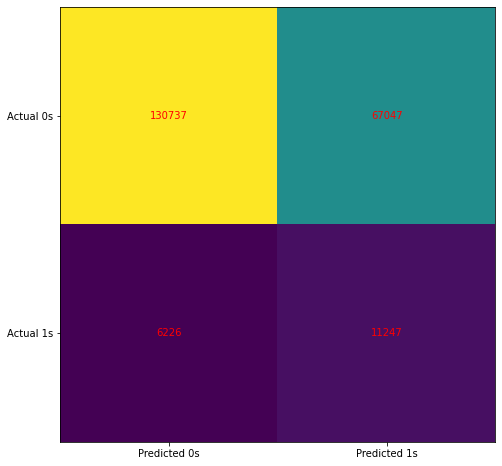

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train_n, model_true.predict(X_train_n))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Судя по матрице ошибок, модель смогла уловить и предсказать, что "0" результат встречается чаще, чем "1", и все-таки предсказанные результаты '1' перетянули на себя значительную часть True-результатов "0". Теперь понятно, почему наша точность равна 66%, и где конкретно наблюдается просадка по результатам работы модели

In [60]:
print(classification_report(y_train_n, model_true.predict(X_train_n)))

              precision    recall  f1-score   support

           0       0.95      0.66      0.78    197784
           1       0.14      0.64      0.23     17473

    accuracy                           0.66    215257
   macro avg       0.55      0.65      0.51    215257
weighted avg       0.89      0.66      0.74    215257



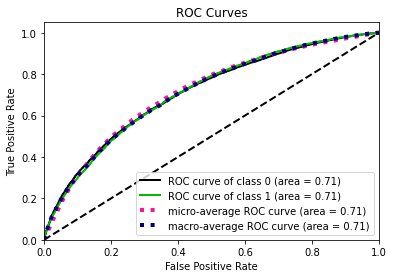

In [61]:
import scikitplot
scikitplot.metrics.plot_roc(y_test_n, model_true.predict_proba(X_test_n.fillna(0)))
plt.show()

In [62]:
model_for_submit = log_reg.fit(X_norm_train.fillna(0), Y_train)

In [63]:
predicted_result = model_for_submit.predict(X_norm_test.fillna(0))

In [64]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['TARGET']= predicted_result
sample_submission.to_csv('result.csv', index = False)

# Результат на kaggle по итогу в 0.54289